# ACTIONet core functionalities 

In [1]:
from ACTIONet import *

In [2]:
# Imports PBMC 3k dataset from scanpy
import scanpy as sc
pbmc = sc.datasets.pbmc3k_processed()
ACTIONet_out = pbmc
ACTIONet_out

AnnData object with n_obs × n_vars = 2638 × 1838 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'

In [3]:
# Performs kernel reduction
reduce_kernel(ACTIONet_out)

Running reduction in dense mode ...
Done.


In [4]:
# Runs ACTION for a range of archetypes (2..30 by default)
C, H = run_ACTION(ACTIONet_out)

Running ACTION ... 
Done.


In [5]:
# Preprocesses archetypes to prune likely noisy archetypes.
prune_archetypes(ACTIONet_out, C, H)

In [6]:
# Uses k*-NN together with JS metric on archetypes to construct the cell-cell network (ACTIONet graph)
build_ACTIONet(ACTIONet_out)

Building ACTIONet graph ...
Done.


In [7]:
# Computes 2D/3D embedding of cells, as well as their de novo coloring
layout_ACTIONet(ACTIONet_out)

In [8]:
# Identifies and unifies redundant archetypes into equivalent classes and assigns cells to each class
unify_archetypes(ACTIONet_out)

In [9]:
compute_archetype_core_centrality(ACTIONet_out)

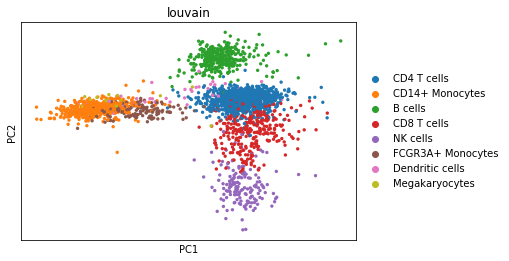

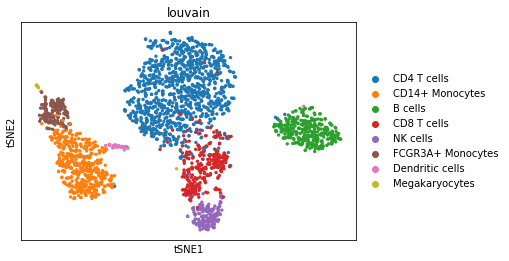

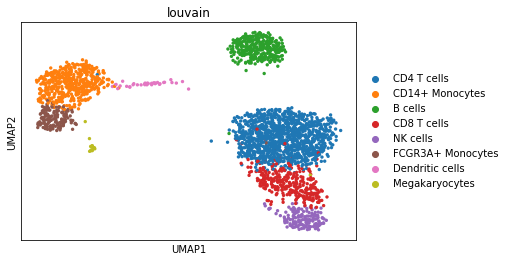

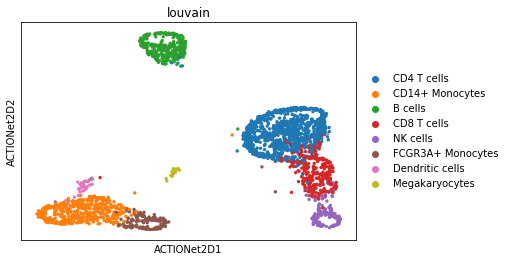

In [12]:
sc.plotting.embedding(ACTIONet_out, "pca", color="louvain")
sc.plotting.embedding(ACTIONet_out, "tsne", color="louvain")
sc.plotting.embedding(ACTIONet_out, "umap", color="louvain")
sc.plotting.embedding(ACTIONet_out, "ACTIONet2D", color="louvain")


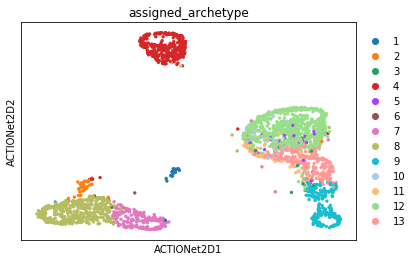

In [13]:
sc.plotting.embedding(ACTIONet_out, "ACTIONet2D", color="assigned_archetype")